# **Meta 1**

Incluir modelo de sensor de alcance (sonar) no robô simulado.
Implementar telecomando do robô a partir do teclado, de modo a
controlar o seu movimento para frente ou para trás e para a direita
ou para a esquerda. O simulador deve apresentar nova tela com as
medições obtidas pelo sensor de alcance a partir dos obstáculos
detectados pelo mesmo em função do tempo, assim como a posição
(x,y) em função do tempo

Obs.: Inserir as seguintes linhas ao script do robô para ser desenhado o caminho

```lua
--lua

sim = require('sim')

function sysCall_init()
    robot = sim.getObject('.')
    robotTrace = sim.addDrawingObject(sim.drawing_linestrip + sim.drawing_cyclic, 8, 0, -1, 400, {1, 1, 0}, nil, nil, {1, 1, 0})
end

function sysCall_sensing()
    local p = sim.getObjectPosition(robot)
    p[3]=0
    sim.addDrawingObjectItem(robotTrace, p)
end 
```


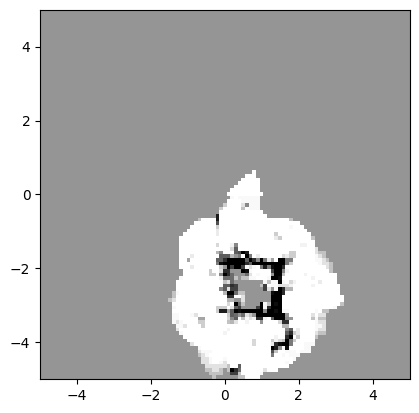

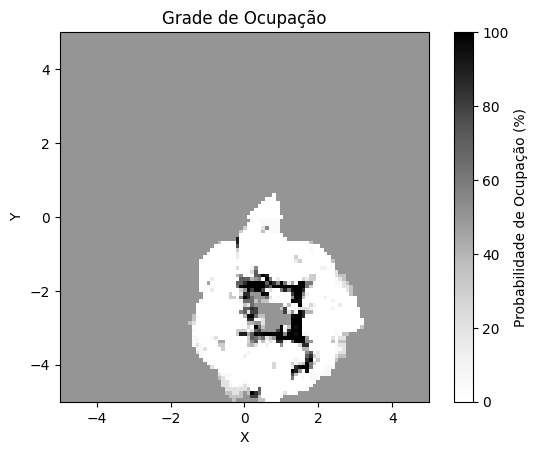

Program ended


In [1]:
from RobotLibrary import *

print('Program started')
sim.simxFinish(-1)
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)

if clientID != -1:
    print('Connected to remote API server')
    try:
        controller = RobotController(clientID)
        controller.clear_map_grid()
        # controller.fill_map_grid(1, 1)
        controller.manual_control_loop()
        controller.plot_occupancy_grid()
        
        # controller.fill_map_grid(np.array([0,0,0]),0.534)
        

    except Exception as e:
        print(f"An error occurred: {e}")

    sim.simxFinish(clientID)
else:
    print('Failed connecting to remote API server')

print('Program ended')